In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_csv(
    "/home/jhr/Documents/data/PRSA_data_2010.1.1-2014.12.31.csv"
    # "../data/PRSA_data_2010.1.1-2014.12.31.csv"
    )

In [13]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [14]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [15]:
data['pm2.5'].isna().sum()  # 检查所有的na数据

2067

In [16]:
# 对于nav数据，利用之前的数据进行填充
data = data.iloc[24:].fillna(method='ffill')

In [17]:
data['pm2.5'].isna().sum()

0

In [18]:
import datetime

In [19]:
data['tm'] = data.apply(lambda x: datetime.datetime(year=x['year'],
                                                    month=x['month'],
                                                    day=x['day'],
                                                    hour=x['hour']), axis=1
                        )

In [20]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [21]:
# 删除部分数据
data.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)

In [22]:
# 将tm作为索引
data = data.set_index('tm')

In [23]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [24]:
data.cbwd.unique()  # 获取数据中唯一值

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [25]:
# 将独热编码后的cvwd方向增加到data中
data = data.join(pd.get_dummies(data.cbwd))

In [26]:
data.drop(columns=['cbwd'],inplace=True)

In [27]:
data.head()  # 返回前几行数据

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


<Axes: xlabel='tm'>

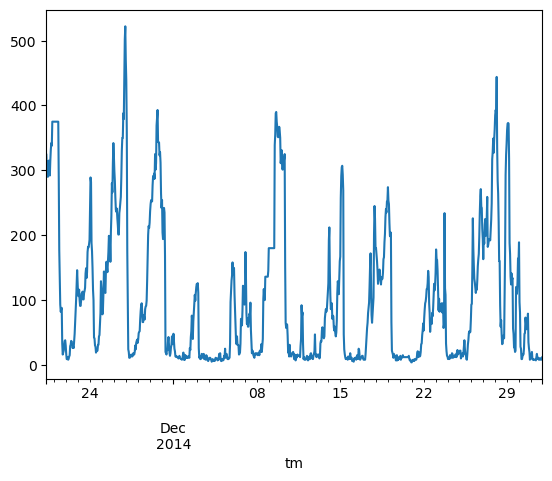

In [28]:
data['pm2.5'][-1000:].plot()

In [29]:
seq_lenth = 5*24  # train 120
delay = 24  # label 24

In [30]:
data_ = []  # 列表

data总共有43800行数据，训练数据为5*24小时的天气数据，训练标签为24小时的pm2.5的浓度

data_形状为(43656,144,12)表明该列表总共43656行，每行由144个数据，每个数据由12部分数据组合

In [31]:
for i in range(len(data)-seq_lenth-delay):
    data_.append(data.iloc[i:i+seq_lenth+delay])

In [32]:
# 将列表转换为集合
data_ = np.array([df.values for df in data_])

In [33]:
data_.shape

(43656, 144, 11)

In [34]:
np.random.shuffle(data_)  # 乱序

In [35]:
x = data_[:, :5*24, :]  # 切片[开始：停止：间隔]

In [36]:
x.shape

(43656, 120, 11)

In [37]:
y = data_[:, -1, 0]

In [38]:
y.shape

(43656,)

In [39]:
split_b = int(data_.shape[0]*0.8)

In [40]:
#训练数据
train_x = x[:split_b]#数据
train_y = y[:split_b]#标签
#测试数据
test_x = x[split_b:]
test_y = y[split_b:]

In [41]:
test_x.shape,test_y.shape

((8732, 120, 11), (8732,))

**数据标准化**

In [42]:
# train_x=train_x.astype(np.float64)
# test_x=test_x.astype(np.float64)
mean=train_x.mean(axis=0)
std=train_x.std(axis=0)

In [43]:
train_x=(train_x-mean)/std
test_x=(test_x-mean)/std

In [44]:
train_x.shape

(34924, 120, 11)

In [45]:
test_x.shape

(8732, 120, 11)

**创建模型**

In [46]:
batch_size=128

Flatten 层是 TensorFlow 中的一个层，用于将输入张量展平为一维张量。Flatten 层经常用于在卷积神经网络 (CNN) 中将卷积层的输出转换为全连接层的输入。

In [38]:
model=keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))#120,11
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

In [39]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])#均方差


In [41]:
history=model.fit(train_x,
                  train_y,
                  batch_size=batch_size,
                  epochs=50,
                  # validation_data=(test_x,test_y)
                  )

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [42]:
history.history.keys()

NameError: name 'history' is not defined

In [ ]:
#显示平均误差
plt.plot(history.epoch,history.history.get('mae'),c='r',label='training')
plt.plot(history.epoch,history.history.get('val_mae'),c='b',label='testing')
plt.legend()

上图可知，由于模型的深度较小，训练后的误差在50%左右，假设正确值为100，则预测的数据为50或150（这个是回归模型）

 ## 建立LSTM网络模型

In [ ]:
train_x.shape

lstm网络输入的数据是一个三维，总数据，观测数据，以及数据特征


In [ ]:
#创建模型
model=keras.Sequential()
model.add(layers.LSTM(32,input_shape=(train_x.shape[1:])))
model.add(layers.Dense(1))#对于回归问题，输出不需要激活函数 

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])#均方差

In [ ]:
history=model.fit(train_x,
                  train_y,
                  batch_size=batch_size,
                  epochs=100,
                  validation_data=(test_x,test_y)
                  )

In [ ]:
#显示平均误差
plt.plot(history.epoch,history.history.get('mae'),c='r',label='training')
plt.plot(history.epoch,history.history.get('val_mae'),c='b',label='testing')
plt.legend()

## LSTM优化

在训练过程中降低学习速率

In [51]:
#创建模型
model=keras.Sequential()
model.add(layers.LSTM(32,input_shape=(train_x.shape[1:]),return_sequences=True))#out层都输出
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))#对于回归问题，输出不需要激活函数 

In [52]:
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.8,min_lr=0.000001)

In [53]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])#均方差

In [54]:
history=model.fit(train_x,
                  train_y,
                  batch_size=batch_size,
                  epochs=100,
                  validation_data=(test_x,test_y),
                  callbacks=[lr_reduce]
                  )

Epoch 1/100
273/273 [==============================] - 31s 75ms/step - loss: 15941.1748 - mae: 87.6095 - val_loss: 14793.8545 - val_mae: 81.3352 - lr: 0.0010
Epoch 2/100
273/273 [==============================] - 18s 67ms/step - loss: 14261.7666 - mae: 79.9712 - val_loss: 13472.7295 - val_mae: 75.9660 - lr: 0.0010
Epoch 3/100
273/273 [==============================] - 18s 67ms/step - loss: 13040.1318 - mae: 75.3329 - val_loss: 12391.7549 - val_mae: 72.1106 - lr: 0.0010
Epoch 4/100
273/273 [==============================] - 18s 67ms/step - loss: 12028.4941 - mae: 71.8948 - val_loss: 11493.4170 - val_mae: 69.2131 - lr: 0.0010
Epoch 5/100
273/273 [==============================] - 18s 66ms/step - loss: 11191.2334 - mae: 69.3721 - val_loss: 10757.7344 - val_mae: 67.1449 - lr: 0.0010
Epoch 6/100
273/273 [==============================] - 18s 66ms/step - loss: 10503.3516 - mae: 67.6020 - val_loss: 10160.6396 - val_mae: 65.7732 - lr: 0.0010
Epoch 7/100
273/273 [==============================]

KeyboardInterrupt: 

In [ ]:
# model.save('pm2.5_v1.h5')

In [ ]:
plt.plot(history.epoch,history.history.get('mae'),c='r',label='training')
plt.plot(history.epoch,history.history.get('val_mae'),c='b',label='testing')
plt.legend()

## 使用模型进行预测

In [55]:
new_model=tf.keras.models.load_model("/home/jhr/pm2.5_v1.h5")

In [57]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 120, 32)           5632      
                                                                 
 lstm_6 (LSTM)               (None, 120, 32)           8320      
                                                                 
 lstm_7 (LSTM)               (None, 120, 32)           8320      
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
#模型的评价
new_model.evaluate(test_x,test_y,verbose=0)

[2635.8583984375, 32.80181884765625]

In [62]:
pre_test=new_model.predict(test_x)

273/273 [==============================] - 5s 14ms/step


In [65]:
pre_test

array([[100.88525 ],
       [157.87274 ],
       [117.43089 ],
       ...,
       [ 59.39696 ],
       [ 93.25651 ],
       [ 33.114597]], dtype=float32)

In [66]:
test_y

array([ 99., 273., 144., ...,  20.,  32., 234.])

In [70]:
test_x.shape,test_y.shape,pre_test.shape

((8732, 120, 11), (8732,), (8732, 1))

In [71]:
pre_test[:5]

array([[100.88525],
       [157.87274],
       [117.43089],
       [ 38.09892],
       [236.31248]], dtype=float32)

In [72]:
test_y[:5]

array([ 99., 273., 144.,  26., 199.])

**单条数据预测**

In [83]:
data = pd.read_csv(
    "/home/jhr/Documents/data/PRSA_data_2010.1.1-2014.12.31.csv"
    # "../data/PRSA_data_2010.1.1-2014.12.31.csv"
    )

In [84]:
data_test=data[-120:]

In [85]:
data_test

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43704,43705,2014,12,27,0,163.0,-10,-5.0,1030.0,NW,1.79,0,0
43705,43706,2014,12,27,1,194.0,-10,-5.0,1030.0,NW,3.58,0,0
43706,43707,2014,12,27,2,187.0,-10,-5.0,1030.0,NW,5.37,0,0
43707,43708,2014,12,27,3,216.0,-11,-6.0,1030.0,NW,7.16,0,0
43708,43709,2014,12,27,4,225.0,-11,-6.0,1030.0,NW,8.95,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [86]:
data_test=data_test.iloc[:,5:]

In [87]:
data_test

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43704,163.0,-10,-5.0,1030.0,NW,1.79,0,0
43705,194.0,-10,-5.0,1030.0,NW,3.58,0,0
43706,187.0,-10,-5.0,1030.0,NW,5.37,0,0
43707,216.0,-11,-6.0,1030.0,NW,7.16,0,0
43708,225.0,-11,-6.0,1030.0,NW,8.95,0,0
...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [89]:
data_test=data_test.join(pd.get_dummies(data_test.cbwd))

In [92]:
data_test.drop('cbwd',axis=1,inplace=True)

In [95]:
# data_test.reindex(columns=[])#排列所有的列
data_test

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
43704,163.0,-10,-5.0,1030.0,1.79,0,0,0,1,0,0
43705,194.0,-10,-5.0,1030.0,3.58,0,0,0,1,0,0
43706,187.0,-10,-5.0,1030.0,5.37,0,0,0,1,0,0
43707,216.0,-11,-6.0,1030.0,7.16,0,0,0,1,0,0
43708,225.0,-11,-6.0,1030.0,8.95,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [96]:
#数据归一化
data_test=(data_test-mean)/std

In [97]:
data_test=data_test.to_numpy()

In [98]:
data_test

array([[ 0.71139815, -0.82567656, -1.43844794, ...,  1.4578032 ,
        -0.73285758, -0.52459848],
       [ 1.05046629, -0.82525713, -1.43842001, ...,  1.45302081,
        -0.73465851, -0.52162391],
       [ 0.97459661, -0.82583767, -1.4387557 , ...,  1.45550428,
        -0.73424276, -0.52371079],
       ...,
       [-0.96189379, -1.66300737, -1.28044209, ...,  1.45349784,
        -0.73488953, -0.52033565],
       [-0.98568945, -1.66393734, -1.36254351, ...,  1.45502613,
        -0.73202698, -0.52331127],
       [-0.94193014, -1.59523936, -1.27986348, ...,  1.45655718,
        -0.73391945, -0.52406589]])

In [100]:
#数据扩充维度
data_test=np.expand_dims(data_test,0)
# data_test.reshape(1,120,11)

In [101]:
data_test.shape

(1, 120, 11)

In [102]:
new_model.predict(data_test)

1/1 [==============================] - 0s 36ms/step


array([[58.39847]], dtype=float32)